# Prediction using Decision tree Algorithm - task 6




# DAHMANI SALAH EDDINE 


In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#reading the data
data=pd.read_csv('Dataset6.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


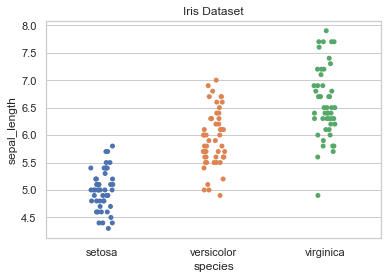

In [6]:
print(data.Species.nunique())
print(data.Species.value_counts())
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

<AxesSubplot:>

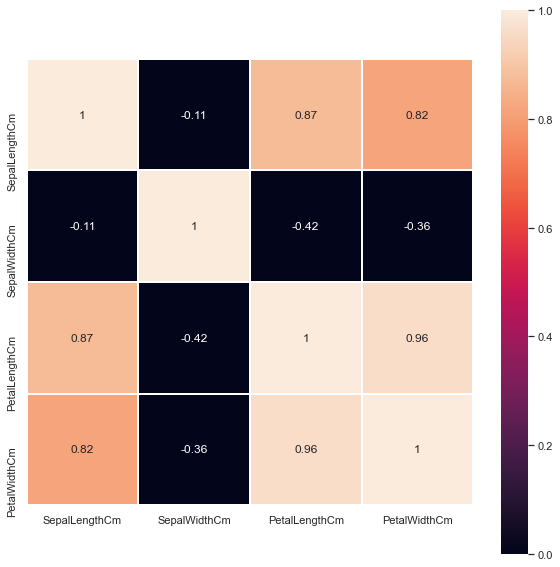

In [7]:
data.corr()
iris1 = data.corr() #correlation of iris dataset
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

<AxesSubplot:>

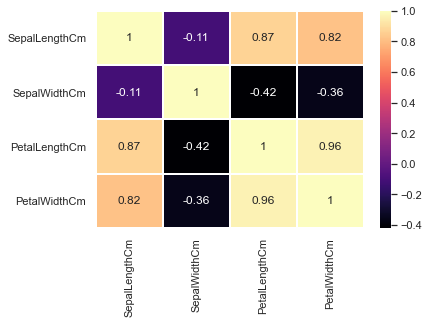

In [8]:
sns.heatmap(data.corr(), annot=True, linewidth=1, cmap='magma')


In [9]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 4)

In [10]:
#defining the attributes and labels
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

(150, 5)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Traingin split: (120, 4)
Testin spllit: (30, 4)
Decision Tree Classifier created!


In [12]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.87      0.93        15
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.94      0.93      0.93        30



In [13]:
acc = sm.accuracy_score(y_test,y_pred)
print("The Accuracy is: {0}%".format(acc*100))
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

The Accuracy is: 93.33333333333333%


array([[ 5,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 10]])

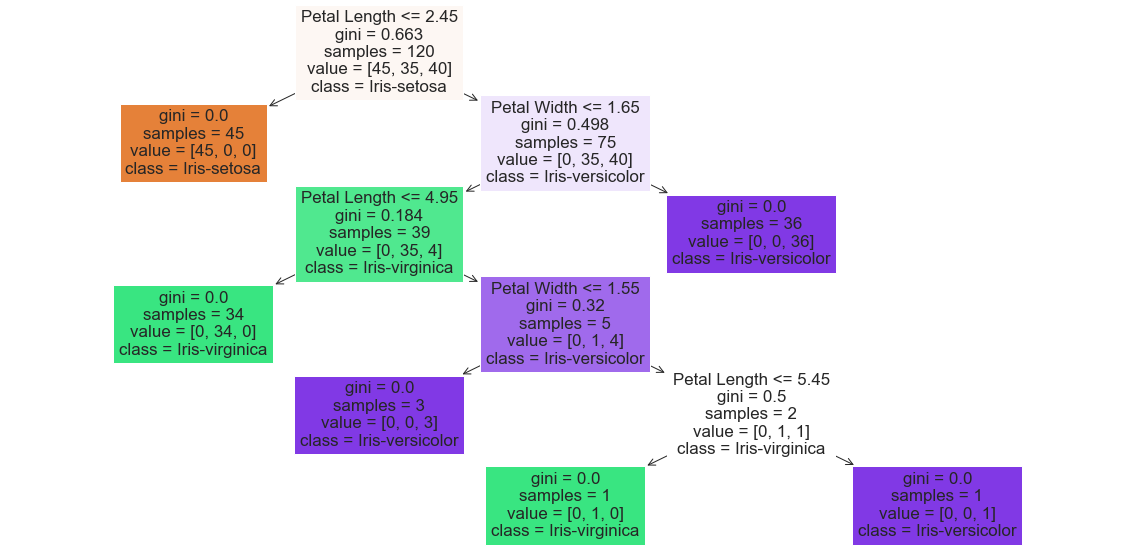

In [14]:
#visualizing the graph
plt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
feature=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_name =['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
plot_tree(dtree, filled = True,class_names=class_name,feature_names=feature);
plt.show()